# Ensemble Vis


In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
from glob import glob

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import joypy
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import cm

# Load predictions

In [9]:
!ls ../mnist/mnist/hdr/adaboost/adaboost_ensemble_size32_model_10_predictions.csv

../mnist/mnist/hdr/adaboost/adaboost_ensemble_size32_model_10_predictions.csv


# load prediction `.csv`

In [28]:
file_name = "../mnist/mnist/hdr/averaging/averaging_ensemble_size32_model_10_predictions.csv"

df_model = pd.read_csv(file_name)
df_model = df_model.rename(columns={'pred':'prediction', 'target_label':'target'})
df_model = df_model.assign(sample_index_original = df_model.index)
df_model = df_model.sort_values(by=['target']).reset_index(drop=True)
df_model = df_model.assign(sample_index = df_model.index)
df_model

,0,1,2,3,4,5,6,7,8,9,prediction,target,sample_index_original,sample_index
0,6.437074e-23,7.304004e-34,7.304004e-34,7.304004e-34,5.000000e-01,5.000000e-01,6.437074e-23,6.437074e-23,6.437074e-23,6.437074e-23,4,0,9,0
1,4.291383e-23,3.333333e-01,3.333333e-01,4.869337e-34,4.869337e-34,4.291383e-23,4.291383e-23,3.333333e-01,4.291383e-23,4.291383e-23,1,1,0,1
2,2.500000e-01,2.836521e-12,2.500000e-01,2.500000e-01,3.218537e-23,3.218537e-23,3.218537e-23,2.836521e-12,3.218537e-23,2.500000e-01,0,1,10,2
3,4.291383e-23,3.333333e-01,3.782259e-12,3.782259e-12,3.333333e-01,4.869337e-34,4.291383e-23,3.333333e-01,4.291383e-23,4.291383e-23,1,2,1,3
4,4.869337e-34,4.291383e-23,3.333333e-01,3.333333e-01,3.782259e-12,3.333333e-01,4.869337e-34,3.782259e-12,4.869337e-34,4.869337e-34,2,2,11,4
5,1.134678e-11,1.460801e-33,1.134678e-11,1.000000e+00,1.460801e-33,1.460801e-33,1.287415e-22,1.287415e-22,1.134678e-11,1.134678e-11,3,3,2,5
6,1.134608e-11,1.134608e-11,1.287415e-22,1.134608e-11,1.287415e-22,1.134608e-11,1.134608e-11,1.134608e-11,1.134608e-11,1.000000e+00,9,3,12,6
7,5.673388e-12,5.000000e-01,6.437074e-23,7.304004e-34,5.000000e-01,5.673388e-12,6.437074e-23,6.437074e-23,5.673388e-12,7.304004e-34,1,4,3,7
8,3.333333e-01,4.291383e-23,3.782259e-12,4.869337e-34,3.333333e-01,4.291383e-23,3.333333e-01,3.782259e-12,4.291383e-23,4.869337e-34,0,4,13,8
9,5.000000e-01,7.304004e-34,7.304004e-34,6.437074e-23,7.304004e-34,5.000000e-01,5.673388e-12,7.304004e-34,5.673388e-12,6.437074e-23,0,5,4,9


## process all predictions

In [11]:


# which models to load
model_names = ["averaging", "bagging", "adaboost"]

# initialize dataframe
df_results = pd.DataFrame()

# loop over hyperparameters
for model_name in model_names:
    
    # find all ensemble member prediction files
    # glob_str = f"jet_tagger/jsc/{model_name}/{model_name.replace('_independent','')}_large_*_model_*_predictions.csv"
    glob_str = f"../mnist/mnist/hdr/{model_name}/{model_name}_*_predictions.csv"
    file_names = list(sorted(glob(glob_str)))

    # loop over ensemble members
    for file_name in file_names:
        
        # parse model index
        model_index = int(file_name.split("_model_")[-1].split("_predictions")[0])
        
        # display file info
        print(f"[+] {file_name} ({model_index=})")
        
        # load prediction file
        df_model = pd.read_csv(file_name)

        df_model = df_model.rename(columns={'pred':'prediction', 'target_label':'target'})
        df_model = df_model.assign(sample_index_original = df_model.index)
        df_model = df_model.sort_values(by=['target']).reset_index(drop=True)
        df_model = df_model.assign(sample_index = df_model.index)

        df_model = df_model.assign(model_index = model_index)
        df_model = df_model.assign(model_name = model_name)

        df_results = pd.concat([df_results, df_model], ignore_index=True, axis=0)

        
        
# sort results by model_name, model_index
df_results = df_results.sort_values(['model_name', 'model_index']).reset_index(drop=True)

# show df
df_results

[+] ../mnist/mnist/hdr/averaging/averaging_ensemble_size32_model_10_predictions.csv (model_index=10)
[+] ../mnist/mnist/hdr/averaging/averaging_ensemble_size32_model_11_predictions.csv (model_index=11)
[+] ../mnist/mnist/hdr/averaging/averaging_ensemble_size32_model_12_predictions.csv (model_index=12)
[+] ../mnist/mnist/hdr/averaging/averaging_ensemble_size32_model_13_predictions.csv (model_index=13)
[+] ../mnist/mnist/hdr/averaging/averaging_ensemble_size32_model_14_predictions.csv (model_index=14)
[+] ../mnist/mnist/hdr/averaging/averaging_ensemble_size32_model_15_predictions.csv (model_index=15)
[+] ../mnist/mnist/hdr/averaging/averaging_ensemble_size32_model_16_predictions.csv (model_index=16)
[+] ../mnist/mnist/hdr/averaging/averaging_ensemble_size32_model_17_predictions.csv (model_index=17)
[+] ../mnist/mnist/hdr/averaging/averaging_ensemble_size32_model_18_predictions.csv (model_index=18)
[+] ../mnist/mnist/hdr/averaging/averaging_ensemble_size32_model_19_predictions.csv (model_

,0,1,2,3,4,5,6,7,8,9,prediction,target,sample_index_original,sample_index,model_index,model_name
0,0.985784,0.000273,0.000273,0.000273,0.000273,0.004192,0.000273,0.000273,0.004192,0.004192,0,0,9,0,1,adaboost
1,0.000260,0.936830,0.000260,0.000260,0.000260,0.000260,0.000260,0.061092,0.000260,0.000260,1,1,0,1,1,adaboost
2,0.000277,0.997511,0.000277,0.000277,0.000277,0.000277,0.000277,0.000277,0.000277,0.000277,1,1,10,2,1,adaboost
3,0.003869,0.003869,0.909727,0.003869,0.003869,0.003869,0.003869,0.003869,0.059324,0.003869,2,2,1,3,1,adaboost
4,0.000276,0.000276,0.993571,0.000276,0.000276,0.000276,0.000276,0.004225,0.000276,0.000276,2,2,11,4,1,adaboost
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1531,0.000177,0.000177,0.000177,0.000177,0.003145,0.000177,0.995442,0.000177,0.000177,0.000177,6,6,5,11,32,bagging
1532,0.000177,0.000177,0.000177,0.000177,0.000177,0.000177,0.998405,0.000177,0.000177,0.000177,6,6,15,12,32,bagging
1533,0.000176,0.003126,0.000176,0.003126,0.000176,0.000176,0.000176,0.989568,0.000176,0.003126,7,7,6,13,32,bagging
1534,0.000177,0.000177,0.000177,0.000177,0.000177,0.000177,0.000177,0.000177,0.998405,0.000177,8,8,7,14,32,bagging


In [27]:
df_model.sample_index_original

0      9
1      0
2     10
3      1
4     11
5      2
6     12
7      3
8     13
9      4
10    14
11     5
12    15
13     6
14     7
15     8
Name: sample_index_original, dtype: int64

In [26]:
df_results.sample_index.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

## define which samples to use

In [29]:
np.random.seed(0)

n_classes = 10
n_samples = 15
n_samples_per_class = n_samples//n_classes

# loop over n_classes and sample from each
use_samples = []
for target in range(n_classes):
    df_target = df_results.loc[df_results.target.isin([target])]
    target_samples = df_target.sample_index.unique()
    use_samples += list(sorted(np.random.choice(target_samples, n_samples_per_class, replace=False)))

use_samples

[0, 2, 3, 5, 8, 9, 11, 13, 14, 15]

In [33]:
np.random.seed(0)

df = df_results.copy()
df = df.loc[df.model_name.isin(['adaboost'])]
# df = df.loc[df.sample_index.isin(np.random.choice(df.sample_index, 20))]
df = df.loc[df.sample_index.isin(use_samples)]
df = df.sort_values('target')
df
df.groupby('target').count()

,0,1,2,3,4,5,6,7,8,9,prediction,sample_index_original,sample_index,model_index,model_name
target,,,,,,,,,,,,,,,
0,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32
1,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32
2,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32
3,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32
4,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32
5,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32
6,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32
7,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32
8,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32


## ploy Joy Division style plot

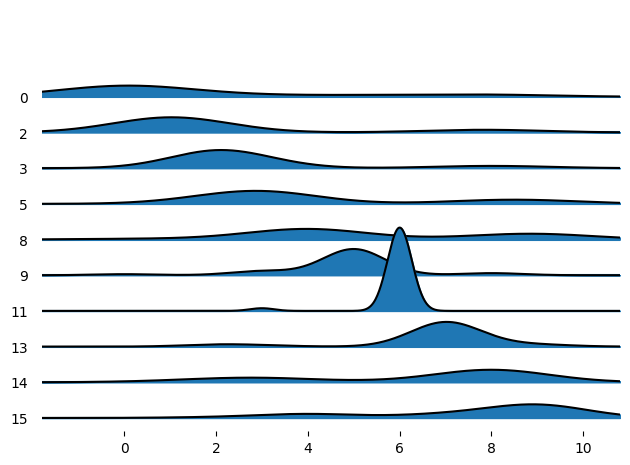

In [34]:
fig, axes = joypy.joyplot(df, by="sample_index", column="prediction")

<AxesSubplot: xlabel='prediction', ylabel='Density'>

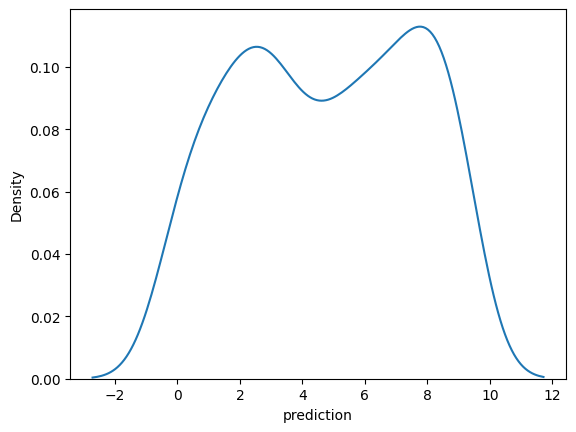

In [35]:
sns.kdeplot(df, x="prediction")

## ploy Joy Division style plot

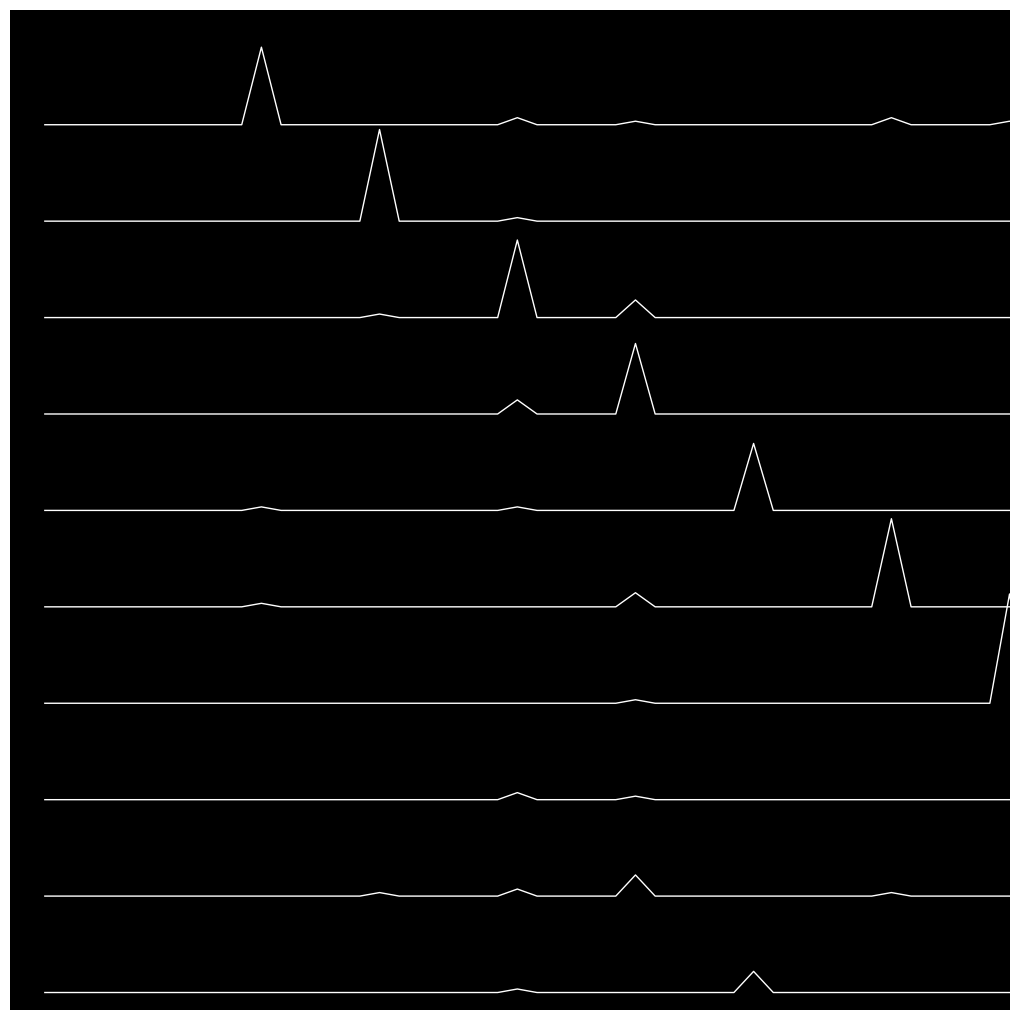

In [36]:
%matplotlib inline

labels = df.target.tolist()
fig, axes = joypy.joyplot(df, by="sample_index", column="prediction", 
                        fill=False, background='k', linecolor="w", linewidth=1, 
                        grid="y", ylabels=False, xlabels=False, 
                        legend=False, overlap=0.5, figsize=(10,10), kind="counts", bins=80)

plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
for a in axes[:-1]:
    # a.set_xlim([-1,5])   
    a.set_xlim([-2,6])   


## multiple plots


model_name=averaging


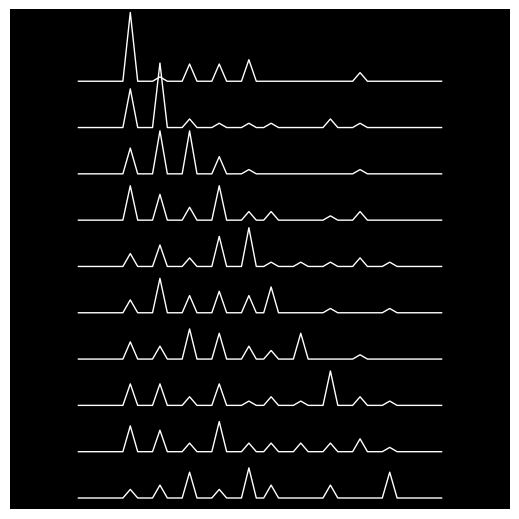

model_name=bagging


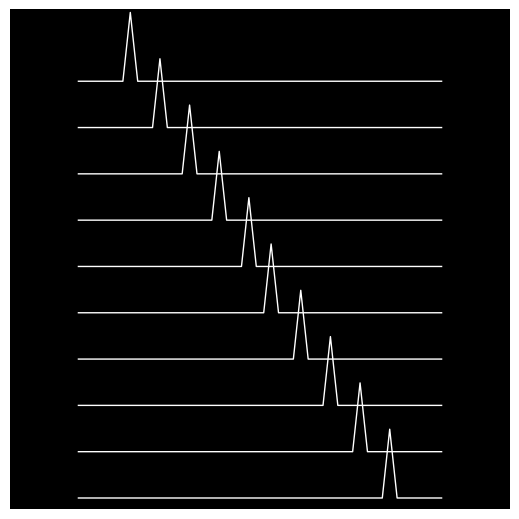

model_name=adaboost


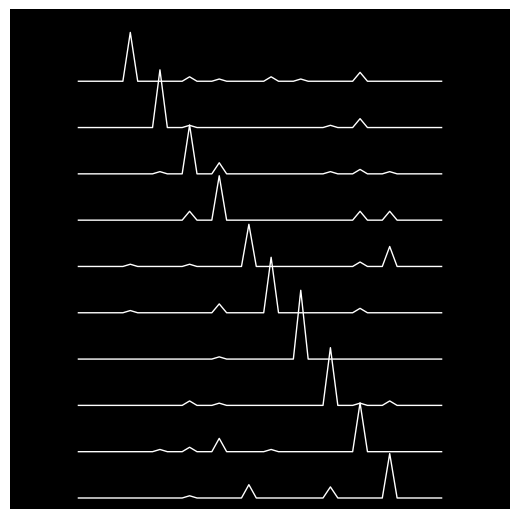

In [50]:
%matplotlib inline


### settings
n_classes = 10
n_samples = 10 # 100
n_samples_per_class = n_samples//n_classes

np.random.seed(0)


### define which samples to use
# loop over n_classes and sample from each
use_samples = []
for target in range(n_classes):
    df_target = df_results.loc[df_results.target.isin([target])]
    target_samples = df_target.sample_index.unique()
    use_samples += list(sorted(np.random.choice(target_samples, n_samples_per_class, replace=False)))


### do plotting for each model
# loop over models 
for model_name in model_names:
        
    print(f"model_name={model_name}")

    # extract results
    # np.random.seed(0)

    df = df_results.copy()
    df = df.loc[df.model_name.isin([model_name])]
    df = df.loc[df.sample_index.isin(use_samples)]
    df = df.sort_values('target')

    # df = df.loc[df.sample_index.isin(np.random.choice(df.sample_index, n_samples))]
    #df = df.sort_values(["target"]) #, "sample_index", "model_index"])
    #df = df.reset_index(drop=True)

    # plot results
    labels = df.target.tolist()
    fig, axes = joypy.joyplot(df, by="sample_index", column="prediction", 
                            fill=False, background='k', linecolor="w", linewidth=1, 
                            grid="y", ylabels=False, xlabels=False, 
                            legend=False, overlap=0.5, figsize=(5,5), 
                            kind="counts", bins=50
                            )

    plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
    for a in axes[:-1]:
        # a.set_xlim([-2,6])      
        a.set_xlim([-4,13])      
    plt.show()

        

In [48]:
df.sort_values(["target"])

,0,1,2,3,4,prediction,target,sample_index_original,sample_index,model_index,model_name
1,0.675824,0.218419,0.040131,0.049596,0.016029,0,0,708,1,1,adaboost
7570,0.196249,0.205741,0.111338,0.226124,0.260548,4,0,100,30,11,adaboost
7544,0.247730,0.259712,0.079736,0.140546,0.272275,4,0,118,4,11,adaboost
7541,0.206372,0.206372,0.237788,0.237788,0.111680,2,0,708,1,11,adaboost
4528,0.268182,0.268182,0.127034,0.160446,0.176155,0,0,118,4,7,adaboost
...,...,...,...,...,...,...,...,...,...,...,...
6765,0.305733,0.335530,0.010261,0.012947,0.335530,1,4,339,733,9,adaboost
6759,0.324577,0.324577,0.013744,0.012524,0.324577,0,4,211,727,9,adaboost
6755,0.200431,0.200431,0.191324,0.166413,0.241401,4,4,226,723,9,adaboost
2251,0.006225,0.016013,0.397816,0.503816,0.076130,3,4,316,743,3,adaboost


In [47]:
%matplotlib inline


### settings
n_classes = 5
n_samples = 100
n_samples_per_class = n_samples//n_classes

np.random.seed(0)


### define which samples to use
# loop over n_classes and sample from each
use_samples = []
for target in range(n_classes):
    df_target = df_results.loc[df_results.target.isin([target])]
    target_samples = df_target.sample_index.unique()
    use_samples += list(sorted(np.random.choice(target_samples, n_samples_per_class, replace=False)))


### do plotting for each model
# loop over models 
for model_name in model_names:
        
    print(f"model_name={model_name}")

    # extract results
    # np.random.seed(0)

    df = df_results.copy()
    df = df.loc[df.model_name.isin([model_name])]
    df = df.loc[df.sample_index.isin(use_samples)]
    # df = df.loc[df.sample_index.isin(np.random.choice(df.sample_index, n_samples))]
    #df = df.sort_values(["target"]) #, "sample_index", "model_index"])
    #df = df.reset_index(drop=True)

    # plot results
    labels = df.target.tolist()
    fig, axes = joypy.joyplot(df, by="sample_index", column="prediction", 
                            fill=True, background='k', linecolor="w", linewidth=1, 
                            grid="y", ylabels=False, xlabels=False, 
                            legend=False, overlap=0.5, figsize=(5,5), 
                            kind="counts", bins=20
                            )

    plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
    for a in axes[:-1]:
        a.set_xlim([-2,6])      
    plt.show()



ValueError: Cannot take a larger sample than population when 'replace=False'

## Plot heatmaps instead

model_name=averaging


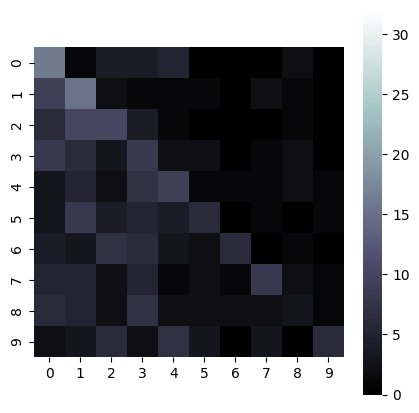

model_name=bagging


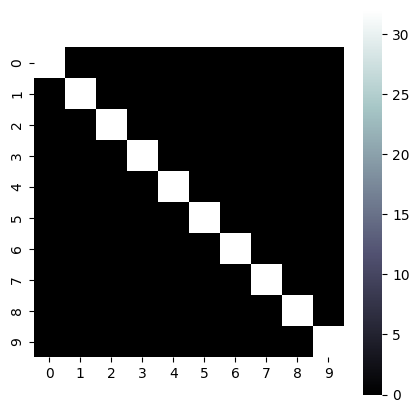

model_name=adaboost


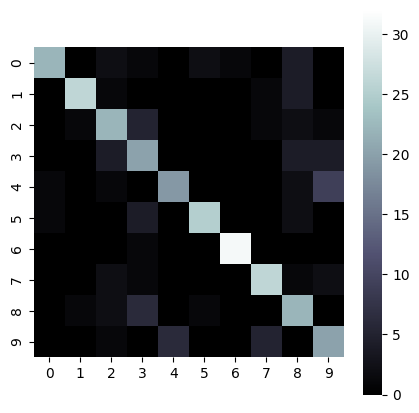

In [51]:
%matplotlib inline


### settings
n_classes = 10
n_samples = 10
n_samples_per_class = n_samples//n_classes

np.random.seed(0)


### define which samples to use
# loop over n_classes and sample from each
use_samples = []
for target in range(n_classes):
    df_target = df_results.loc[df_results.target.isin([target])]
    target_samples = df_target.sample_index.unique()
    use_samples += list(sorted(np.random.choice(target_samples, n_samples_per_class, replace=False)))


### do plotting for each model
# loop over models 
for model_name in model_names:
        
    print(f"model_name={model_name}")

    # extract results
    # np.random.seed(0)

    df = df_results.copy()
    df = df.loc[df.model_name.isin([model_name])]
    df = df.loc[df.sample_index.isin(use_samples)]
    df = df.sort_values("target")
    # df = df.loc[df.sample_index.isin(np.random.choice(df.sample_index, n_samples))]
    #df = df.sort_values(["target"]) #, "sample_index", "model_index"])
    #df = df.reset_index(drop=True)


    # TODO: there's gotta be a better way to do this 
    rows = np.zeros((n_samples, n_classes))
    for i, sample_index in enumerate(use_samples):

        # select all member predictions for given sample
        df_sample = df.set_index("sample_index").loc[sample_index]

        # count number of predictions per classs
        for prediction in df_sample.prediction.values:
            rows[i, prediction] += 1

    # show rows (use max model index across all methods)
    # sns.heatmap(rows, cmap='bone', cbar=True, figure=plt.figure(figsize=(5,5)), vmin=0, vmax=df_results.model_index.max())
    # plt.show()
    
    # show rows (use methods max model index)
    sns.heatmap(rows, cmap='bone', square=True, cbar=True, figure=plt.figure(figsize=(5,5)), vmin=0, vmax=df.model_index.max())
    plt.show()


## Disagreement Rate

In [58]:
model_name = 'bagging'

df = df_results.copy()
df = df.loc[df.model_name.isin([model_name])]
# df = df.loc[df.sample_index.isin(use_samples)]
df = df.sort_values("target")
df

,0,1,2,3,4,5,6,7,8,9,prediction,target,sample_index_original,sample_index,model_index,model_name
1024,0.943173,0.000190,0.000190,0.000190,0.000190,0.000190,0.000190,0.000190,0.055306,0.000190,0,0,9,0,1,bagging
1088,0.945555,0.000168,0.000168,0.000168,0.000168,0.000168,0.000168,0.000168,0.053105,0.000168,0,0,9,0,5,bagging
1104,0.995567,0.000170,0.000170,0.000170,0.000170,0.000170,0.000170,0.000170,0.003070,0.000170,0,0,9,0,6,bagging
1120,0.995696,0.000164,0.000164,0.000164,0.000164,0.000164,0.000164,0.000164,0.002992,0.000164,0,0,9,0,7,bagging
1136,0.994449,0.000228,0.000228,0.000228,0.000228,0.000228,0.000228,0.000228,0.003726,0.000228,0,0,9,0,8,bagging
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1439,0.002871,0.002871,0.002871,0.002871,0.002871,0.002871,0.002871,0.002871,0.002871,0.974162,9,9,8,15,26,bagging
1455,0.000203,0.000203,0.000203,0.000203,0.000203,0.000203,0.000203,0.000203,0.000203,0.998177,9,9,8,15,27,bagging
1471,0.002748,0.000145,0.000145,0.000145,0.002748,0.000145,0.000145,0.000145,0.000145,0.993491,9,9,8,15,28,bagging
1503,0.003199,0.000182,0.000182,0.000182,0.003199,0.000182,0.000182,0.000182,0.000182,0.992331,9,9,8,15,30,bagging


model_name=averaging
	mean(d_ave)=0.007829666137695312, mean(d_sum)=4.0087890625)


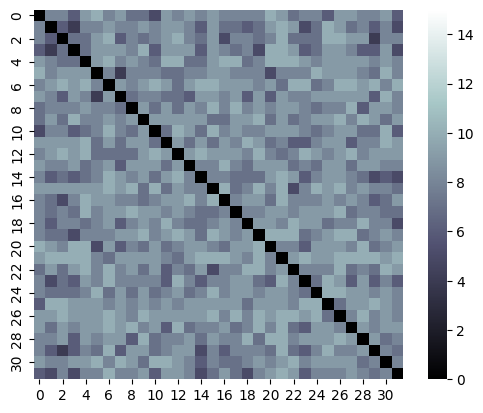

model_name=bagging
	mean(d_ave)=0.0, mean(d_sum)=0.0)


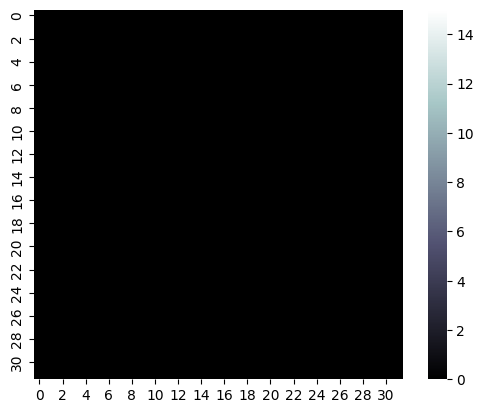

model_name=adaboost
	mean(d_ave)=0.0041408538818359375, mean(d_sum)=2.1201171875)


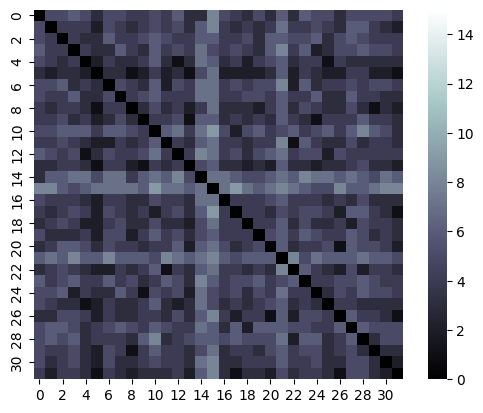

In [74]:

### do plotting for each model
# loop over models 
for model_name in model_names:
        
    print(f"model_name={model_name}")
    
    
    # all samples
    df = df_results.copy()
    df = df.loc[df.model_name.isin([model_name])]
    # df = df.loc[df.sample_index.isin(use_samples)]
    df = df.sort_values("target")

    
    n_models = len(df.model_index.unique())

    # TODO: there's gotta be a better way to do this 
    disagreement = np.zeros((len(df), n_models, n_models))
    for i, sample_index in enumerate(use_samples):

        # select all member predictions for given sample
        df_sample = df.set_index("sample_index").loc[sample_index]

        # count number of predictions per classs
        for j,prediction_j in enumerate(df_sample.prediction.values):
            for k,prediction_k in enumerate(df_sample.prediction.values):
                #print(j,k,prediction_j, prediction_k )
                disagreement[i, j, k] = 1*(prediction_j != prediction_k)
    

    # compute average disagreement over samples
    disagreement_sum = np.sum(disagreement, axis=0)
    disagreement_ave = np.mean(disagreement, axis=0)
    print(f"\tmean(d_ave)={np.mean(np.triu(disagreement_ave,1))}, mean(d_sum)={np.mean(np.triu(disagreement_sum,1))})")
          
    sns.heatmap(disagreement_sum, vmin=0, vmax=n_samples, cmap="bone", square=True)
    plt.show()
          


<AxesSubplot: >

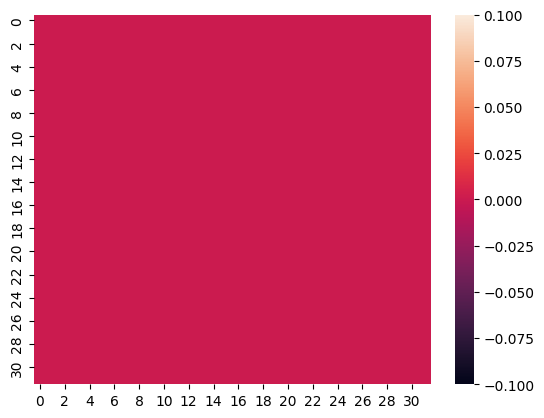

In [60]:
sns.heatmap(disagreement)